In [ ]:
# 安裝能夠掛載硬碟在 Google Drive
!pip install google.colab

In [ ]:
# 掛載硬碟
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

In [ ]:
# 切換目錄 (Colab 預設目錄為 /content，使用 %cd 切換目錄)
%cd /content/drive/My Drive/

In [ ]:
'''
# PyTorch
https://pytorch.org/

# diffusers
https://github.com/huggingface/diffusers

# Stability AI
https://huggingface.co/stabilityai

# 用來申請授權的範例: stable-diffusion-xl-base-1.0
https://huggingface.co/stabilityai/stable-diffusion-xl-base-1.0

# Negative Prompts 全攻略
https://blog.256pages.com/negative-prompts/

# 圖像生成是如何運作？用Pytorch實作Stable Diffusion！
https://edge.aif.tw/express-stable-diffusion/
'''

In [ ]:
# 安裝 PyTorch
!pip install torch torchvision torchaudio

In [ ]:
# 安裝神經網路相關套件
!pip install transformers accelerate numpy sentencepiece protobuf scipy safetensors invisible_watermark

In [ ]:
# 安裝 diffusers
!pip install --upgrade diffusers[torch]

In [ ]:
from diffusers import DiffusionPipeline
import torch


model_id = "stable-diffusion-v1-5/stable-diffusion-v1-5"

pipe = DiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe.to("cuda")

prompt = '''A cute little pig is sitting on the sofa indoors, watching TV and eating ice cream.'''

pipe(prompt).images[0]

In [24]:
# 清除先前占用 GPU 的記憶體
import gc
pipe = None
image = None
gc.collect()
with torch.no_grad():
    torch.cuda.empty_cache()

In [ ]:
# 安裝 Huggingface 套件
!pip install huggingface_hub

In [16]:
from huggingface_hub import notebook_login
notebook_login()

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

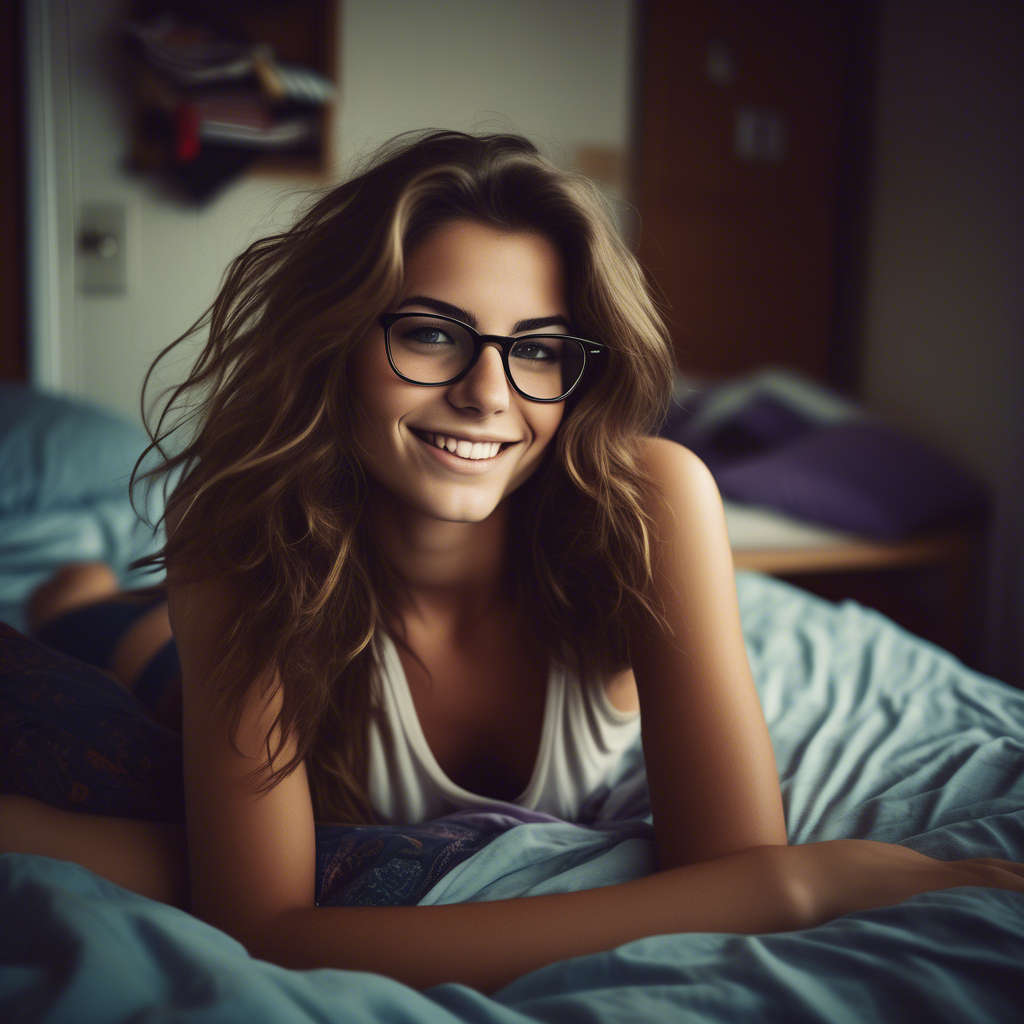

In [23]:
from diffusers import DiffusionPipeline
import torch

# 模型的代號 (從 Huggingface 取得)
model_id = "stabilityai/stable-diffusion-xl-base-0.9"

# 讀取預訓練模型，並由 pipeline 物件來實作
# (會自動從 Huggingface 下載，要先從 Huggingface 取得 Token)
pipe = DiffusionPipeline.from_pretrained(
    model_id,
    torch_dtype=torch.float16,
    use_safetensors=True,
    variant="fp16"
)

# 將讀取的模型放到 GPU memory 當中
pipe = pipe.to("cuda")

# 如果 GPU 不夠大，可以部分模型的運算讓 CPU 相關資源來分擔
# pipe.enable_model_cpu_offload()

# 希望圖片生成什麼樣子或情境，通常會是一段描述 + 形容詞或是形容詞 + 名詞
prompt = '''iphone photo young college woman, long tousled brunette hair, no makeup, beautiful smile, lying on her bed in her messy dorm room, wearing glasses, tank top, shorts . large depth of field, deep depth of field, highly detailed'''


# 把不希望出現在圖片中的元素寫在這裡，通常會是形容詞或是形容詞+名詞
negative_prompt = '''drawing, painting, crayon, sketch, graphite, impressionist, noisy, blurry, soft, deformed, ugly, shallow depth of field, bokeh, (worst quality, low quality, illustration, 3d, 2d, painting, cartoons, sketch) , tooth, dull, blurry, watermark, low quality, (flash:1.2) , black and white, makeup, jewelry, necklace'''

# 使用 pipeline 生成
image = pipe(
    prompt,
    negative_prompt=negative_prompt,
    num_inference_steps=50,
    width=1024,
    height=1024,
    guidance_scale=7.5,
).images[0]
'''
num_inference_steps：
一般來說，使用的step越多，結果越好，但是step越多，所需的生成時間就越長。
由於Stable Diffusion 在step相對少的情況下效果很好，通常建議使用預設的數值為50。
想要更快的結果，可以使用較小的step；想要更高品質的結果，可以使用更大的數字。

guidance_scale：
Guidance Scale是生成圖片與輸入提示的緊密程度，及輸入的多樣性間的平衡，它的典型值在7.5左右。
增加的比例越多，圖片的質量就越高，但是得到的多樣性就越低。
'''

# 使用 Juypter Notebook 特性來預覽結果
image

# 儲存圖片 (記得先透過 %cd 切換到 /content/drive/My Drive/)
# image.save("./result.png")